In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [178]:
def checkIntersection(s1, s2):
    s1vec = s1[1] - s1[0]
    s2vec = s2[1] - s2[0]
    s1[0] += s1vec*0.001
    s1[1] -= s1vec*0.001

    s2[0] +=s2vec*0.001
    s2[1] -=s2vec*0.001

    s1vec = s1[1] - s1[0]
    s2vec = s2[1] - s2[0]
    dist1Vec = s1[0] - s2[0]
    dist2Vec = s1[1] - s2[1]

    if ((s1vec[0]*dist1Vec[1] - s1vec[1]*dist1Vec[0])*(s1vec[0]*dist2Vec[1] - s1vec[1]*dist2Vec[0]) < -1e-6 and
        (s2vec[0]*dist1Vec[1] - s2vec[1]*dist1Vec[0])*(s2vec[0]*dist2Vec[1] - s2vec[1]*dist2Vec[0]) < -1e-6):
        return True
    elif ((s1vec[0]*dist1Vec[1] - s1vec[1]*dist1Vec[0])*(s1vec[0]*dist2Vec[1] - s1vec[1]*dist2Vec[0]) < 1e-6 and
        (s2vec[0]*dist1Vec[1] - s2vec[1]*dist1Vec[0])*(s2vec[0]*dist2Vec[1] - s2vec[1]*dist2Vec[0]) < 1e-6):
        # print("gugua", np.dot(s1vec, dist1Vec), np.dot(s1vec, dist2Vec), np.dot(s1vec, s1vec))
        if np.dot(s1vec, dist1Vec)*np.dot(s1vec, dist2Vec) < 1e-6:
            return True
        elif (np.dot(s1vec, dist1Vec) >= 0 and np.dot(s1vec, dist1Vec) <= np.dot(s1vec, s1vec) 
              or np.dot(s1vec, dist2Vec) <= 0 and np.dot(s1vec, dist1Vec) >= -np.dot(s1vec, s1vec)):
            return True
    return False

# def ccw(A,B,C):
#     return (C[1]-A[1])*(B[0]-A[0]) > (B[1]-A[1])*(C[0]-A[0])

# def checkIntersection(s1, s2): # (a, b) (c,d)
#         return ccw(s1[0],s2[0],s2[1]) != ccw(s1[1],s2[0],s2[1]) and ccw(s1[0],s1[1],s2[0]) != ccw(s1[0],s1[1],s2[1])

checkIntersection(np.array([(1,1),(2,2)], dtype='f'), np.array([(2,1),(0,0)], dtype='f'))

False

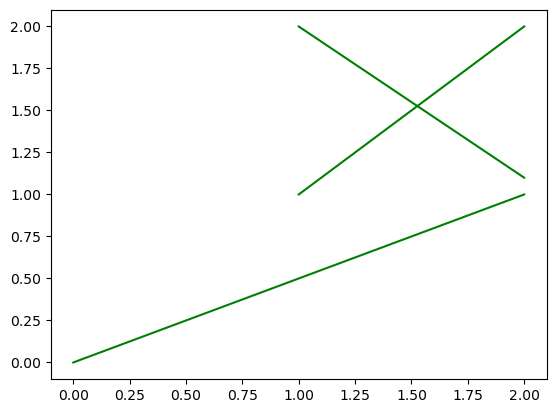

In [185]:
obstacles = (((1, 1), (2, 2)), ((2, 1), (0, 0)), ((2, 1.1), (1, 2))) # (x1, y1), (x2, y2)
def changeLineFormat(lines, intersectSet, color1, color2):
    lineList = []
    for line in lines:
        isInterecting = False
        for li in intersectSet:
            if (checkIntersection(np.array(line, dtype='f'), np.array(li, dtype='f'))):
                isInterecting = True
        lineList += [(line[0][0], line[1][0]), (line[0][1], line[1][1]), color2 if isInterecting else color1]
    return lineList


plt.plot(*changeLineFormat(obstacles, (), 'g', 'r'))

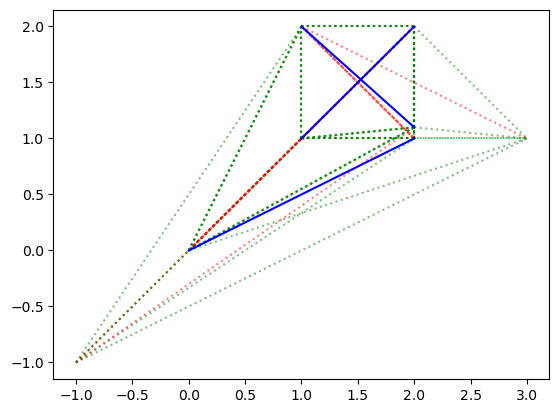

In [187]:
startPos = (-1, -1)
endPos = (3, 1)

def getAllPosibleConections(startPos, endPos, obstacles):
    lines = [(startPos, endPos)]
    for obstacle in obstacles:
        lines.append((startPos, obstacle[0]))
        lines.append((startPos, obstacle[1]))
        lines.append((obstacle[0], endPos))
        lines.append((obstacle[1], endPos))

    for i in range(len(obstacles)):
        for j in range(len(obstacles)):
            if i != j:
                lines.append((obstacles[i][0], obstacles[j][0]))
                lines.append((obstacles[i][0], obstacles[j][1]))
                lines.append((obstacles[i][1], obstacles[j][0]))
                lines.append((obstacles[i][1], obstacles[j][1]))
                lines.append((obstacles[j][0], obstacles[i][0]))
                lines.append((obstacles[j][0], obstacles[i][1]))
                lines.append((obstacles[j][1], obstacles[i][0]))
                lines.append((obstacles[j][1], obstacles[i][1]))

    return lines

plt.plot(*changeLineFormat(getAllPosibleConections(startPos, endPos, obstacles), obstacles, 'g', 'r'), linestyle='dotted', alpha=0.5)
plt.plot(*changeLineFormat(obstacles, (), 'b', 'b'))